In [24]:
IOR_HSW_DIR="/global/cscratch1/sd/fbench/IOR_Temp17/IOR_HSW"
IOR_DVS_DIR="/global/cscratch1/sd/fbench/IOR_Temp17/IOR_DVS/1node_posix_fpp/CORI_dvs_1"
# temporary location for all users: /global/cscratch1/sd/fbench/IOR_Temp17

#  Functions Extracting Max Read/Write and Date of IOR JOB

In [25]:
def parser_ior(dir_path,nodes_posixmpi_dir,block_size,rw_plot,ptitle,latest=None):
    '''
        dir_path: the log path 
        nodes_posixmpi: specify the sub directory # e.g., 1node_posix_fpp
        block_size: _10000_, _100000_, _1000000_ # the IOR block size
        rw_plot: read or write, or readwrite # plot them separately
        ptitle: title for the figure
        latest: only plot the last few days' logs, e.g., latest=20, the last 20 days' log
    '''
    import re,os,time
    import datetime as dt
    dir_tolook=dir_path+"/"+nodes_posixmpi_dir
    #print dir_tolook
    i=0
    ior_dates=[]
    ior_read=[]
    ior_write=[]
    for filename in os.listdir(dir_tolook):
        if filename.endswith("IOR") and re.search(str(block_size),filename):
            file=open(dir_tolook+'/'+filename,'r') 
            stat = os.stat(dir_tolook+'/'+filename)
            xxt=(dt.datetime.strptime(
                    time.ctime(os.path.getmtime(dir_tolook+'/'+filename))
                    ,'%a %b %d %H:%M:%S %Y').date())
            #print xxt
            row = file.readlines()
            for line in row:
                if re.search("Max Write",line):
                    ior_write.append(line.split(' ')[2])
                    ior_dates.append(xxt)
                elif re.search("Max Read",line):
                    ior_read.append(line.split(' ')[3])

    #assert len(ior_dates)==len(ior_read), "len dates %d, len read %d"%(len(ior_dates),len(ior_read))
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    %matplotlib inline
    #x = [dt.datetime.strftime(d,'%m-%d-%Y') for d in ior_dates]
    x=ior_dates
    x=x[-latest:]
    #print x
    import pandas as pd
    dfior=pd.DataFrame(data=x,columns=["date"],index=None) # construct dataframe
    dfior['date']=dfior['date'].astype('datetime64[ns]')
    dfior['read']=ior_read[-latest:]
    dfior['write']=ior_write[-latest:]
    #print dfior
    dfior=dfior.sort_values(by=['date'],axis=0)
    #print dfior
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%d/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().set_xticks(x)
    #plt.gca().xaxis.set_major_locator(Null)
    plt.ylabel("MiB/s")
    plt.xlabel("Date")
    plt.title(ptitle)
    #plt.xaxis
    fig = plt.gcf()
    fig.set_size_inches(16, 6.5)
    #fig.savefig('test2png.png', dpi=100)
    if (rw_plot=="readwrite"):
        plt.plot(dfior.date,dfior.read,'-o',label="read")
        plt.plot(dfior.date,dfior.write,'-ro',label="write")
        plt.legend(["Read","Write"],loc="upper right")
    elif (rw_plot=="read"):
        plt.plot(dfior.date,dfior.read,'-ro',label="read")
    elif(rw_plot=="write"):
        plt.plot(dfior.date,dfior.write,'-ro',label="write")
    
    plt.setp( plt.gca().xaxis.get_majorticklabels(), rotation=80 )
    #plt.gcf().autofmt_xdate()
    #plt.savefig("/global/homes/j/jialin/cori_dvs.png",dpi=500)

# Plot the IOR Test for Project DVS

         date     read    write
0  2017-04-24  6617.41  6826.45
1  2017-01-21  6707.46  6135.51
2  2017-03-20  7095.44  6486.77
3  2016-12-19  6140.73  4965.06
4  2017-02-23  3592.52  5536.10
5  2016-11-28  6480.95  6101.67
6  2017-04-28  6147.15  5685.13
7  2016-12-10  7464.17  6368.12
8  2017-02-03  6313.25  6132.99
9  2017-03-18  5110.21  5015.44
10 2017-02-18  3216.41  5449.92
11 2017-05-01  6319.70  6125.88
12 2017-03-14  5672.80  4845.01
13 2017-05-04  5500.00  3997.34
14 2016-12-15  6297.40  1322.99
15 2017-02-26  5173.05  3843.82
16 2016-12-12  6801.11  3066.31
17 2017-04-21  6159.87  6503.39
18 2017-02-17  5534.73  4920.34
19 2017-04-09  6199.51  5945.92
         date     read    write
5  2016-11-28  6480.95  6101.67
7  2016-12-10  7464.17  6368.12
16 2016-12-12  6801.11  3066.31
14 2016-12-15  6297.40  1322.99
3  2016-12-19  6140.73  4965.06
1  2017-01-21  6707.46  6135.51
8  2017-02-03  6313.25  6132.99
18 2017-02-17  5534.73  4920.34
10 2017-02-18  3216.41  5449.92
4  2017-

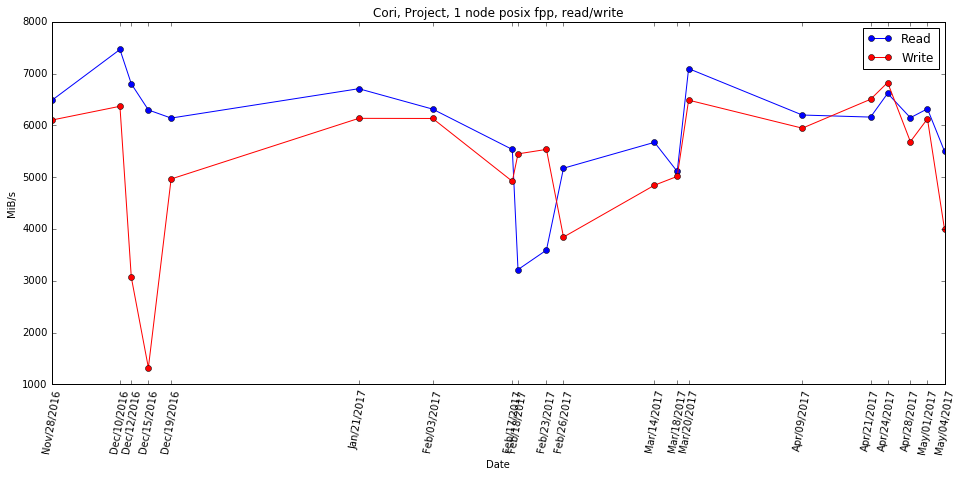

In [26]:
NODES_POSIXMPI_DIR=""
BLOCK_SIZE="_1000000_" #10000, 100000
title="Cori, Project, 1 node posix fpp, read/write"
latest=20
xd=parser_ior(IOR_DVS_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest)

# IOR for CSCRATCH from Haswell

1 node POSIX File per Process

         date     read    write
0  2017-04-21  2192.04  3756.27
1  2017-01-26  1740.08  2315.31
2  2017-01-05  1692.94  3134.31
3  2017-01-19  1425.06  2470.39
4  2016-12-17  1778.75  2990.72
5  2017-03-18  1089.50  2729.27
6  2017-03-12  1161.80  3002.25
7  2016-12-11  1849.24  2879.06
8  2017-01-25  1619.26  2415.16
9  2017-03-17   917.50  2829.82
10 2017-03-06  1826.33  2763.58
11 2017-03-10  1689.12  3031.61
12 2017-02-15  1364.98  2334.63
13 2017-02-17  1621.64  2596.86
14 2017-04-15   519.27  1468.78
15 2017-02-28  1569.01  3137.89
16 2017-04-11  1443.29  3306.76
17 2017-01-29  1125.58  2646.75
18 2017-01-17  1803.98  1770.88
19 2016-12-15  1971.56  3389.34
         date     read    write
7  2016-12-11  1849.24  2879.06
19 2016-12-15  1971.56  3389.34
4  2016-12-17  1778.75  2990.72
2  2017-01-05  1692.94  3134.31
18 2017-01-17  1803.98  1770.88
3  2017-01-19  1425.06  2470.39
8  2017-01-25  1619.26  2415.16
1  2017-01-26  1740.08  2315.31
17 2017-01-29  1125.58  2646.75
12 2017-

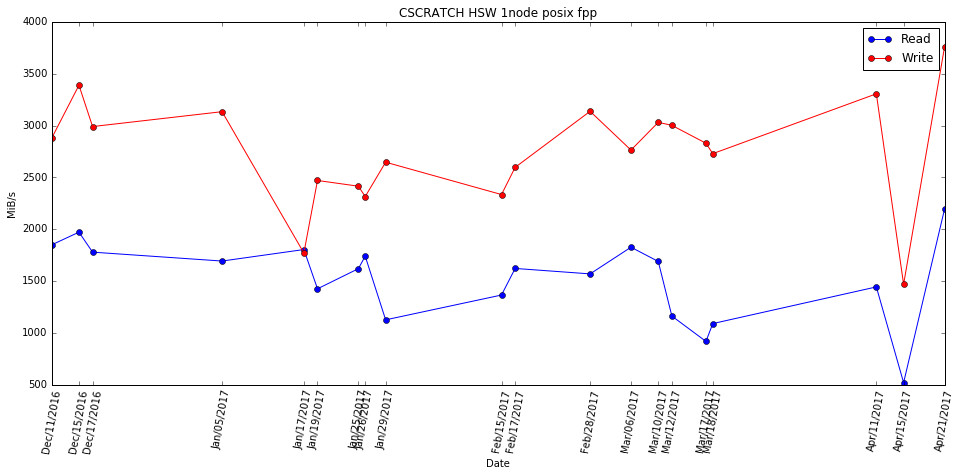

In [27]:
NODES_POSIXMPI_DIR="1node_posix_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

1 Node Posix Single Shared File

         date     read   write
0  2016-12-11   858.30  590.95
1  2017-03-12   672.24  334.21
2  2017-01-26  1084.01  747.42
3  2017-04-11  1056.83  403.71
4  2017-02-28   727.33  418.46
5  2017-01-15   965.89  552.09
6  2017-04-27  1004.48  407.83
7  2017-02-03   372.91  539.36
8  2017-01-08  1125.37  760.56
9  2017-04-15   213.43  248.41
10 2017-02-24   978.99  410.61
11 2017-01-11  1021.02  570.38
12 2017-01-20  1078.51  686.19
13 2017-01-10   766.18  411.73
14 2017-01-16  1290.51  543.71
15 2017-01-12   448.53  509.31
16 2016-12-19   916.71  561.95
17 2017-02-20  1089.57  547.53
18 2017-01-28   744.56  650.62
19 2017-01-22  1000.09  561.40
         date     read   write
0  2016-12-11   858.30  590.95
16 2016-12-19   916.71  561.95
8  2017-01-08  1125.37  760.56
13 2017-01-10   766.18  411.73
11 2017-01-11  1021.02  570.38
15 2017-01-12   448.53  509.31
5  2017-01-15   965.89  552.09
14 2017-01-16  1290.51  543.71
12 2017-01-20  1078.51  686.19
19 2017-01-22  1000.09  561.40
2  2017-

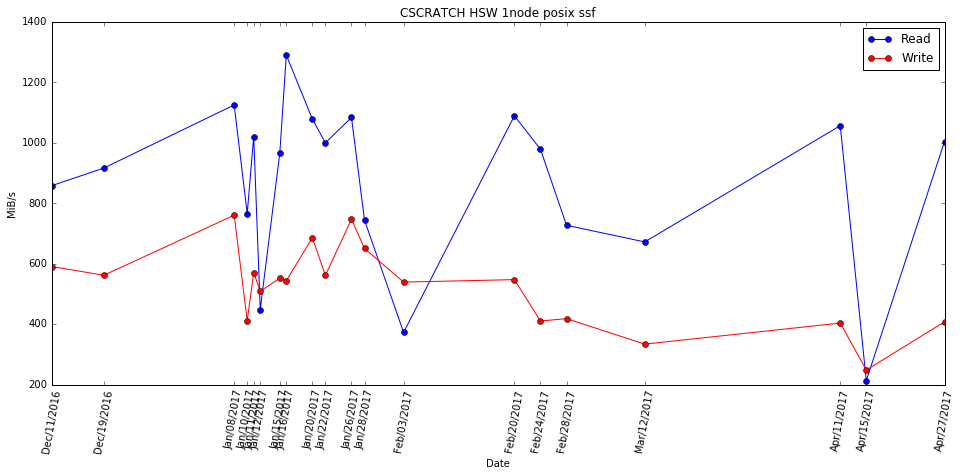

In [28]:
NODES_POSIXMPI_DIR="1node_posix_ssf"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node posix ssf"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest) # options are read, write, readwrite

1 Node MPIIO Single Shared File

         date     read   write
0  2016-12-10   851.46  651.79
1  2017-04-17   736.88  355.57
2  2017-02-17   757.07  447.92
3  2017-01-03   942.74  539.62
4  2016-12-12   984.45  523.70
5  2016-12-13  1037.53  532.15
6  2017-01-05  1163.43  601.52
7  2017-02-15   791.50  429.78
8  2017-03-09   780.44  414.77
9  2017-01-16  1198.15  495.00
10 2017-01-15  1026.27  559.93
11 2017-01-28   693.13  446.41
12 2017-05-05   952.58  360.11
13 2017-01-10   459.88  480.37
14 2017-03-12   661.80  341.19
15 2017-01-14  1203.24  560.14
16 2017-05-06  1043.03  363.94
17 2017-02-25   423.09  315.16
18 2017-01-24  1076.12  586.82
19 2017-03-10  1003.91  481.56
         date     read   write
0  2016-12-10   851.46  651.79
4  2016-12-12   984.45  523.70
5  2016-12-13  1037.53  532.15
3  2017-01-03   942.74  539.62
6  2017-01-05  1163.43  601.52
13 2017-01-10   459.88  480.37
15 2017-01-14  1203.24  560.14
10 2017-01-15  1026.27  559.93
9  2017-01-16  1198.15  495.00
18 2017-01-24  1076.12  586.82
11 2017-

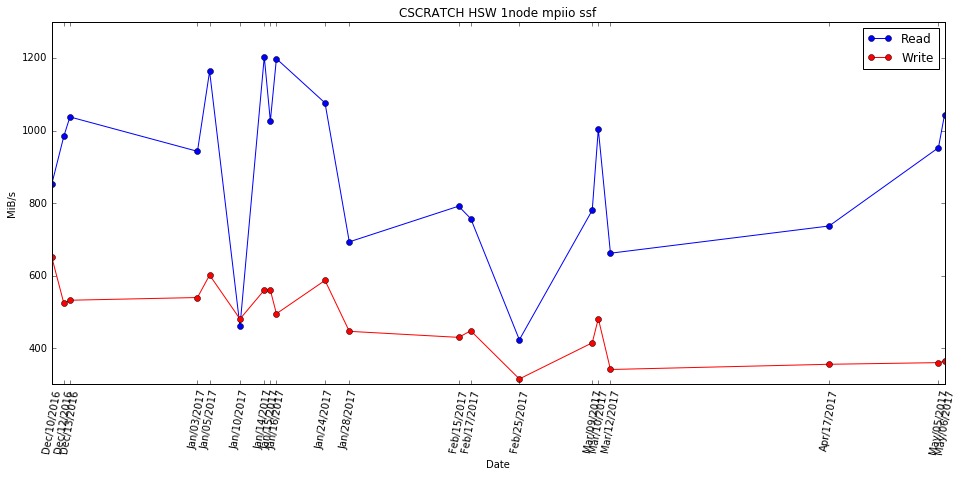

In [29]:
NODES_POSIXMPI_DIR="1node_mpiio_ssf"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node mpiio ssf"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

1 Node MPIIO File per Process

         date     read    write
0  2017-01-13  2136.55  2343.26
1  2017-02-24  1956.20  2690.01
2  2017-02-21  2255.96  2718.11
3  2017-01-10  1147.33  2335.54
4  2017-03-06  2567.02  2378.89
5  2017-04-11  1794.52  2333.67
6  2017-04-27  2727.26  2354.34
7  2017-04-21  2595.52  2434.92
8  2017-04-15   573.74  2348.84
9  2017-03-07  2112.91  2891.64
10 2017-03-12  2110.62  2168.62
11 2016-12-13  1348.15  2209.58
12 2017-01-06   908.52  2465.70
13 2017-02-25   618.56  2495.63
14 2017-03-18  1792.34  2940.88
15 2017-01-03  1917.84  2224.67
16 2017-02-17  1252.02  2337.14
17 2017-01-08  1460.17  2961.57
18 2017-02-26  1689.68  2351.72
19 2017-01-11  2514.84  2059.55
         date     read    write
11 2016-12-13  1348.15  2209.58
15 2017-01-03  1917.84  2224.67
12 2017-01-06   908.52  2465.70
17 2017-01-08  1460.17  2961.57
3  2017-01-10  1147.33  2335.54
19 2017-01-11  2514.84  2059.55
0  2017-01-13  2136.55  2343.26
16 2017-02-17  1252.02  2337.14
2  2017-02-21  2255.96  2718.11
1  2017-

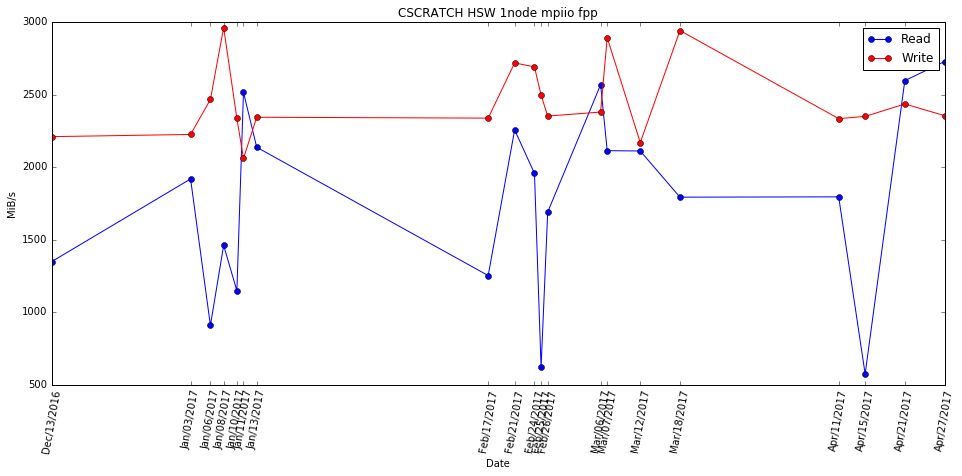

In [30]:
NODES_POSIXMPI_DIR="1node_mpiio_fpp"
BLOCK_SIZE="_1000000_" #10000, 100000
title="CSCRATCH HSW 1node mpiio fpp"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest) # options are read, write, readwrite

32 Node POSIX Single Shared File

         date      read     write
0  2017-01-05  33171.32  20464.36
1  2017-03-09  34381.74  28728.04
2  2017-02-14  32432.41  32575.61
3  2016-12-18  41874.67  20591.63
4  2017-02-03  16726.10  21294.57
5  2017-02-18  20734.02  27800.44
6  2017-01-10  15994.69  20278.36
7  2017-03-07  18914.07  24004.32
8  2017-01-12  12649.58  19078.07
9  2017-01-06  23157.27  22477.71
10 2017-01-29  18424.78  19367.93
11 2017-04-29  39830.39  33102.05
12 2017-04-12  14156.76  26098.30
13 2017-01-22  22450.51  21095.92
14 2016-12-11  38935.31  22312.70
15 2016-12-17  37869.53  22384.19
16 2017-01-16  36934.62  21626.20
17 2017-01-10  33564.41  21617.64
18 2016-12-16  20303.36  20942.39
19 2016-12-15  40874.12  22183.80
         date      read     write
14 2016-12-11  38935.31  22312.70
19 2016-12-15  40874.12  22183.80
18 2016-12-16  20303.36  20942.39
15 2016-12-17  37869.53  22384.19
3  2016-12-18  41874.67  20591.63
0  2017-01-05  33171.32  20464.36
9  2017-01-06  23157.27  22477.71
6  2017-01-10 

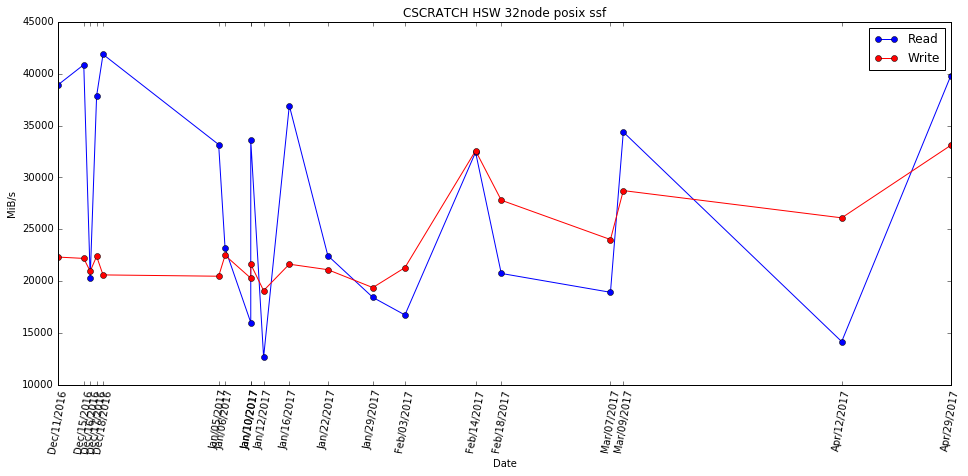

In [31]:
NODES_POSIXMPI_DIR="32node_posix_ssf"
BLOCK_SIZE="ssf" #the 32 node job has different name
title="CSCRATCH HSW 32node posix ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

32 Node POSIX File per Process

         date      read     write
0  2017-02-18  46933.58  84787.26
1  2017-03-04  63692.37  85910.88
2  2017-03-07  32349.53  80637.76
3  2017-01-31  48764.53  95069.33
4  2017-01-27  45894.53  89914.95
5  2016-12-18  56553.05  83880.13
6  2017-01-20  64936.31  42741.02
7  2017-01-28  46512.45  81468.99
8  2017-01-14  48698.30  89110.25
9  2017-04-16  16661.87  37286.94
10 2016-12-14  58909.87  86589.69
11 2017-03-12  65148.73  87781.07
12 2017-02-20  59842.67  89536.84
13 2017-04-11  53358.37  67395.07
14 2016-12-16  72080.00  86666.77
15 2017-04-29  68734.48  62835.75
16 2017-04-10  76960.97  70337.55
17 2017-01-09  31990.65  83442.31
18 2017-04-17  22596.76  40931.86
19 2017-01-06  66592.60  90625.53
         date      read     write
10 2016-12-14  58909.87  86589.69
14 2016-12-16  72080.00  86666.77
5  2016-12-18  56553.05  83880.13
19 2017-01-06  66592.60  90625.53
17 2017-01-09  31990.65  83442.31
8  2017-01-14  48698.30  89110.25
6  2017-01-20  64936.31  42741.02
4  2017-01-27 

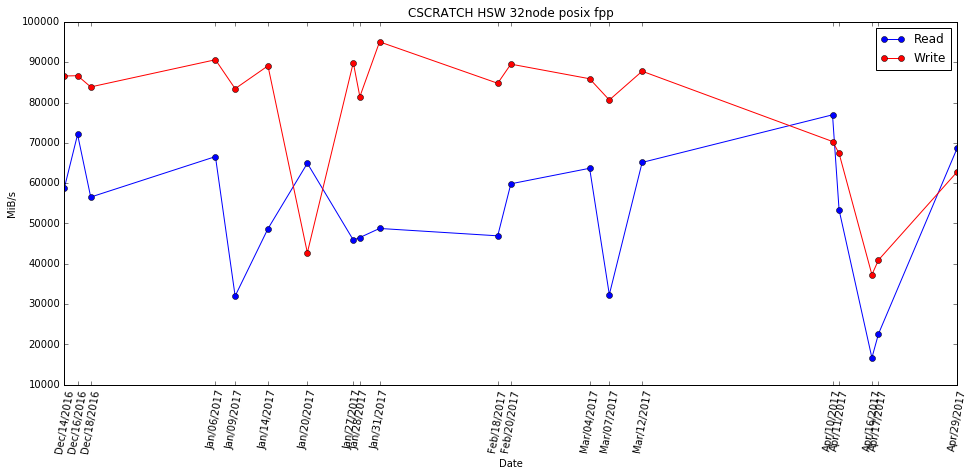

In [32]:
NODES_POSIXMPI_DIR="32node_posix_fpp"
BLOCK_SIZE="1000000" #10000, 100000
title="CSCRATCH HSW 32node posix fpp"
latest=20
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=latest) # options are read, write, readwrite

         date      read     write
0  2017-05-06  73455.48  67616.82
1  2017-01-07  52303.17  88679.46
2  2016-12-19  58056.89  83798.36
3  2017-04-17  38158.46  34609.00
4  2017-02-26  31631.89  83436.31
5  2017-01-05  63513.23  83350.47
6  2017-03-07  34847.62  84372.31
7  2017-03-20  40364.24  87359.34
8  2017-04-09  64884.95  62486.94
9  2017-02-18  51665.42  89166.25
10 2017-01-08  52821.02  89193.62
11 2017-04-16  16218.07  39365.24
12 2016-12-10  69510.03  94128.59
13 2017-01-31  60709.35  86701.44
14 2017-02-25  48821.73  87807.71
15 2017-04-28  45681.73  55608.08
16 2017-01-11  62285.33  93800.53
17 2017-01-09  27993.55  81373.98
18 2017-03-05  38801.95  78268.67
19 2017-01-26  41110.26  84635.47
         date      read     write
12 2016-12-10  69510.03  94128.59
2  2016-12-19  58056.89  83798.36
5  2017-01-05  63513.23  83350.47
1  2017-01-07  52303.17  88679.46
10 2017-01-08  52821.02  89193.62
17 2017-01-09  27993.55  81373.98
16 2017-01-11  62285.33  93800.53
19 2017-01-26 

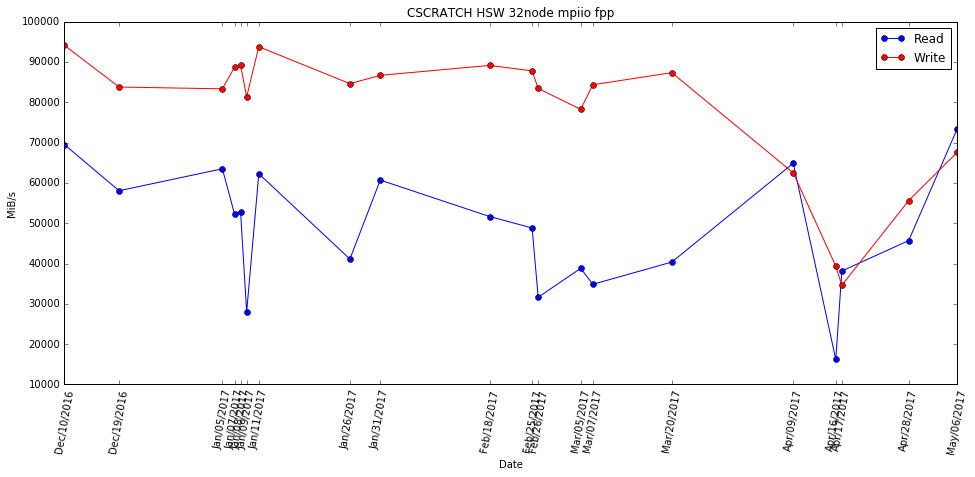

In [33]:
NODES_POSIXMPI_DIR="32node_mpiio_fpp"
BLOCK_SIZE="1000000" #10000, 100000
title="CSCRATCH HSW 32node mpiio fpp"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite

         date      read     write
0  2016-12-14  68765.39  18541.36
1  2017-04-29  50206.75  23786.01
2  2017-01-19  64761.46  18543.53
3  2017-03-11  57581.13  23658.42
4  2017-04-15  65506.02  26012.04
5  2017-01-08  62427.56  18391.77
6  2017-02-24  67220.60  24617.64
7  2016-12-11  63259.05  12987.98
8  2017-02-20  65448.23  24995.35
9  2017-03-13  40780.45  25807.37
10 2017-01-10  42197.80  18367.14
11 2017-04-21  53397.00  24720.96
12 2017-04-13  62205.27  26338.71
13 2017-03-12  61361.78  24907.53
14 2017-02-18  39441.73  25989.37
15 2017-04-16  20075.73  24541.10
16 2017-01-26  37780.50  18293.71
17 2017-01-09  47873.11  18497.52
18 2017-01-05  58327.26  18597.47
19 2017-02-26  54666.19  24826.16
         date      read     write
7  2016-12-11  63259.05  12987.98
0  2016-12-14  68765.39  18541.36
18 2017-01-05  58327.26  18597.47
5  2017-01-08  62427.56  18391.77
17 2017-01-09  47873.11  18497.52
10 2017-01-10  42197.80  18367.14
2  2017-01-19  64761.46  18543.53
16 2017-01-26 

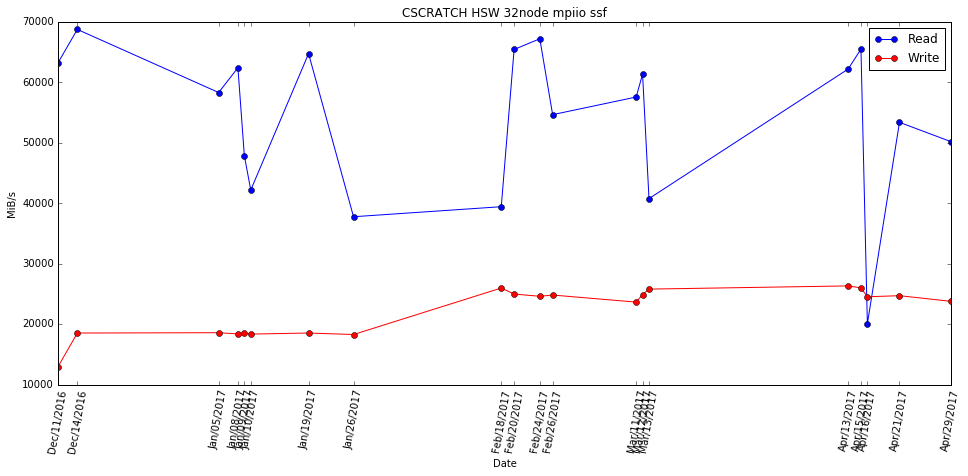

In [34]:
NODES_POSIXMPI_DIR="32node_mpiio_ssf"
BLOCK_SIZE="ssf" #10000, 100000
title="CSCRATCH HSW 32node mpiio ssf"
parser_ior(IOR_HSW_DIR,NODES_POSIXMPI_DIR,BLOCK_SIZE,"readwrite",title,latest=20) # options are read, write, readwrite